In [1]:
print("hello world")

hello world


In [4]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Praktikum SparkSQL") \
    .config("spark.master", "local[*]") \
    .getOrCreate()

spark

In [7]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [9]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [10]:
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
ORDER BY DeptId
''').show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [12]:
spark.sql('''
WITH avg_gender AS ( 
    SELECT Gender, AVG(Salary) AS AvgSalary
    fROM employees
    GROUP BY Gender
)
SELECT e.Name, e.Gender, e.Salary, g.AvgSalary
FROM employees e
JOIN avg_gender g ON e.Gender = g.Gender
WHERE e.Salary > g.AvgSalary
''').show()

+-----+------+------+---------+
| Name|Gender|Salary|AvgSalary|
+-----+------+------+---------+
|James|     M|  3000|   2850.0|
+-----+------+------+---------+



In [11]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [14]:
spark.sql('''
SELECT 
    Name, DeptId, Salary,
    RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS RankInDept
FROM employees
''').show()

+-----+------+------+----------+
| Name|DeptId|Salary|RankInDept|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



In [12]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [15]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [19]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])

projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [20]:
spark.sql('''
SELECT 
    e.Name,
    e.DeptId,
    d.DeptName,
    e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS AvgDeptSalary,
    RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, RankInDept
''').show()

+-----+------+---------+------+-------------+----------+
| Name|DeptId| DeptName|Salary|AvgDeptSalary|RankInDept|
+-----+------+---------+------+-------------+----------+
|James|     1|       HR|  3000|       2850.0|         1|
|  Lee|     1|       HR|  2700|       2850.0|         2|
| Anna|     2|Marketing|  4100|       4100.0|         1|
+-----+------+---------+------+-------------+----------+



In [21]:
spark.sql('''
SELECT
    e.Name,
    e.DeptId,
    d.DeptName,
    e.Age,
    e.Salary,
    LAG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS PrevSalary,
    (e.Salary - LAG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age)) AS SalaryChange
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY e.DeptId, e.Age
''').show()

+-----+------+---------+---+------+----------+------------+
| Name|DeptId| DeptName|Age|Salary|PrevSalary|SalaryChange|
+-----+------+---------+---+------+----------+------------+
|  Lee|     1|       HR| 23|  2700|      null|        null|
|James|     1|       HR| 34|  3000|      2700|         300|
| Anna|     2|Marketing| 28|  4100|      null|        null|
+-----+------+---------+---+------+----------+------------+



In [23]:
!pip install matplotlib

In [2]:
!pip install matplotlib pandas

In [2]:
import sys
print(sys.executable)

/home/hadoop/spark_env/bin/python


In [3]:
! /home/hadoop/spark_env/bin/python -m pip install matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 455.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 359.4 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 342.8 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 297.4 kB/s eta 0:00:001m309.7 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 330.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 424.5 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 397.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 570.6 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 626.1 kB/s eta 0:00:000:00:01m eta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: /home/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
print("sukses")

sukses


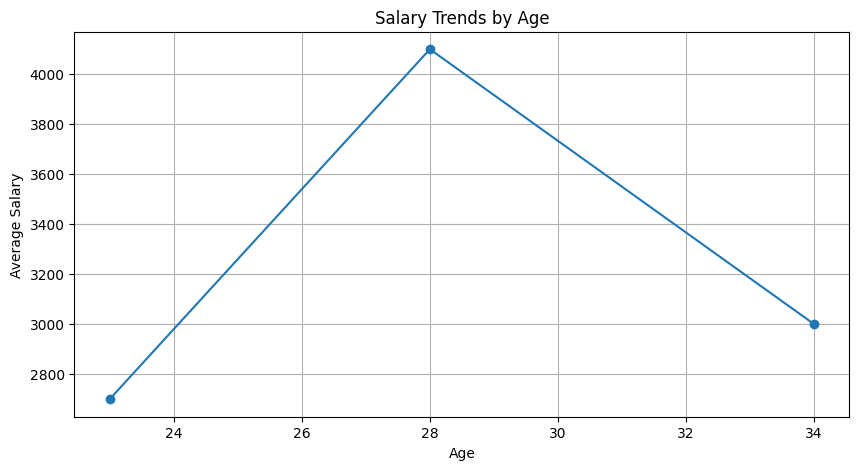

In [16]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName("Salary Analysis").getOrCreate()

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, count

spark = SparkSession.builder.appName("Tugas1_Department").getOrCreate()

data = [
    ('Aldi', 'Sales', 33, 6000),
    ('Tedi', 'Sales', 41, 6800),
    ('Danang', 'IT', 38, 8000),
    ('Budi', 'IT', 25, 7500),
    ('Najla', 'HR', 28, 5200),
    ('Fauzan', 'HR', 35, 5500)
]

columns = ['name', 'department', 'age', 'salary']
df = spark.createDataFrame(data, columns)

df.createOrReplaceTempView("employees")

result = spark.sql("""
SELECT department,
       SUM(salary) AS total_salary,
       COUNT(*) AS total_employees
FROM employees
GROUP BY department
""")

result.show()

[Stage 74:>                                                         (0 + 2) / 2]

+----------+------------+---------------+
|department|total_salary|total_employees|
+----------+------------+---------------+
|     Sales|       12800|              2|
|        IT|       15500|              2|
|        HR|       10700|              2|
+----------+------------+---------------+



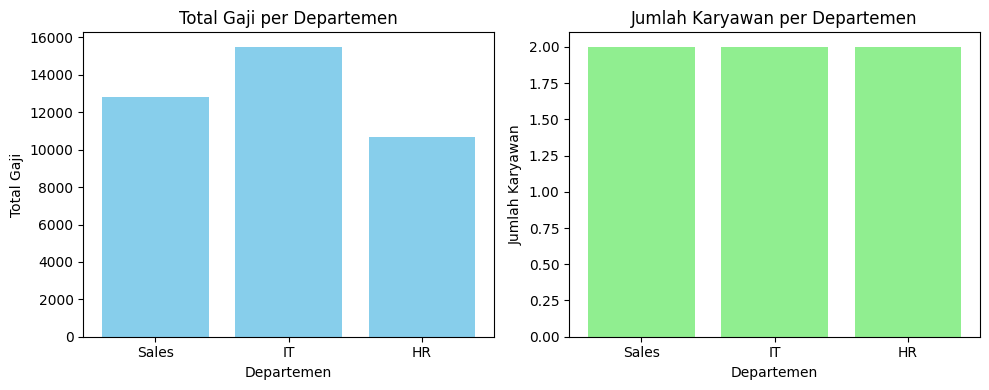

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pandas_df = result.toPandas()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(pandas_df['department'], pandas_df['total_salary'], color='skyblue')
axes[0].set_title('Total Gaji per Departemen')
axes[0].set_xlabel('Departemen')
axes[0].set_ylabel('Total Gaji')

axes[1].bar(pandas_df['department'], pandas_df['total_employees'], color='lightgreen')
axes[1].set_title('Jumlah Karyawan per Departemen')
axes[1].set_xlabel('Departemen')
axes[1].set_ylabel('Jumlah Karyawan')

plt.tight_layout()
plt.show()

In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col

spark = SparkSession.builder.appName("Tugas2_Karyawan").getOrCreate()

data = [
    ('Aldi', 33, 6000),
    ('Tedi', 41, 6800),
    ('Danang', 38, 8000),
    ('Budi',  25, 7500),
    ('Najla',  28, 5200),
    ('Fauzan', 35, 5500),
    ('Farida', 22, 4500),
    ('Rahma', 27, 5000),
    ('Juan', 29, 6100),
    ('Ridho', 30, 5900),
]

df = spark.createDataFrame(data, ['Nama', 'Umur', 'Gaji'])

df = df.withColumn(
    'Kelompok_Umur',
    when(col('Umur') <= 30, 'Muda')
    .when((col('Umur') > 30) & (col('Umur') <= 40), 'Dewasa')
    .otherwise('Senior')
)

df.createOrReplaceTempView("karyawan")
df.show()



+------+----+----+-------------+
|  Nama|Umur|Gaji|Kelompok_Umur|
+------+----+----+-------------+
|  Aldi|  33|6000|       Dewasa|
|  Tedi|  41|6800|       Senior|
|Danang|  38|8000|       Dewasa|
|  Budi|  25|7500|         Muda|
| Najla|  28|5200|         Muda|
|Fauzan|  35|5500|       Dewasa|
|Farida|  22|4500|         Muda|
| Rahma|  27|5000|         Muda|
|  Juan|  29|6100|         Muda|
| Ridho|  30|5900|         Muda|
+------+----+----+-------------+



In [31]:
#Hitung rata-rata gaji tiap kelompok usia
avg_gaji = spark.sql("""
SELECT Kelompok_Umur, AVG(Gaji) AS Rata2_Gaji
FROM karyawan
GROUP BY Kelompok_Umur
""")
avg_gaji.createOrReplaceTempView("avg_gaji")
avg_gaji.show()

+-------------+----------+
|Kelompok_Umur|Rata2_Gaji|
+-------------+----------+
|       Senior|    6800.0|
|       Dewasa|    6500.0|
|         Muda|    5700.0|
+-------------+----------+



In [32]:
above_avg = spark.sql("""
SELECT k.Nama, k.Kelompok_Umur, k.Gaji, a.Rata2_Gaji
FROM karyawan k
JOIN avg_gaji a ON k.Kelompok_Umur = a.Kelompok_Umur
WHERE k.Gaji > a.Rata2_Gaji
ORDER BY k.Kelompok_Umur
""")

above_avg.show()

+------+-------------+----+----------+
|  Nama|Kelompok_Umur|Gaji|Rata2_Gaji|
+------+-------------+----+----------+
|Danang|       Dewasa|8000|    6500.0|
|  Budi|         Muda|7500|    5700.0|
| Ridho|         Muda|5900|    5700.0|
|  Juan|         Muda|6100|    5700.0|
+------+-------------+----+----------+



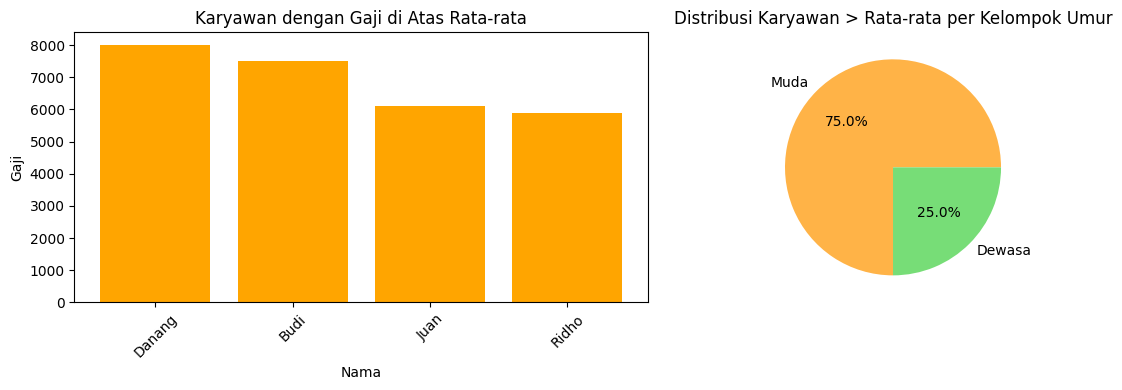

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df_plot = above_avg.toPandas()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(df_plot['Nama'], df_plot['Gaji'], color='orange')
axes[0].set_title('Karyawan dengan Gaji di Atas Rata-rata')
axes[0].set_xlabel('Nama')
axes[0].set_ylabel('Gaji')
axes[0].tick_params(axis='x', rotation=45)

group_count = df_plot['Kelompok_Umur'].value_counts()
axes[1].pie(group_count, labels=group_count.index, autopct='%1.1f%%', colors=['#ffb347','#77dd77','#aec6cf'])
axes[1].set_title('Distribusi Karyawan > Rata-rata per Kelompok Umur')

plt.tight_layout()
plt.show()

In [34]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Karyawan150Baru").getOrCreate()

# Dataset 150 karyawan baru (Nama, Umur, dan Gaji diganti — Departemen tetap)
data_karyawan = [
# Sales
('Rafi1','Sales',24,4500),('Bella2','Sales',27,4700),('Dani3','Sales',29,4900),
('Elma4','Sales',31,5100),('Fikri5','Sales',33,5300),('Gilang6','Sales',35,5500),
('Hana7','Sales',37,5700),('Ilham8','Sales',39,5900),('Jihan9','Sales',41,6100),
('Kamal10','Sales',43,6300),('Lina11','Sales',25,4600),('Miko12','Sales',28,4800),
('Nadia13','Sales',30,5000),('Omar14','Sales',32,5200),('Putra15','Sales',34,5400),
('Qori16','Sales',36,5600),('Rina17','Sales',38,5800),('Sinta18','Sales',40,6000),
('Tegar19','Sales',42,6200),('Ulya20','Sales',44,6400),('Vito21','Sales',26,4700),
('Wanda22','Sales',28,4900),('Xena23','Sales',30,5100),('Yoga24','Sales',32,5300),
('Zara25','Sales',34,5500),('Rafi26','Sales',36,5700),('Bella27','Sales',38,5900),
('Dani28','Sales',40,6100),('Elma29','Sales',42,6300),('Fikri30','Sales',44,6500),

# IT
('Gilang31','IT',25,5200),('Hana32','IT',27,5400),('Ilham33','IT',29,5600),
('Jihan34','IT',31,5800),('Kamal35','IT',33,6000),('Lina36','IT',35,6200),
('Miko37','IT',37,6400),('Nadia38','IT',39,6600),('Omar39','IT',41,6800),
('Putra40','IT',43,7000),('Qori41','IT',26,5400),('Rina42','IT',28,5600),
('Sinta43','IT',30,5800),('Tegar44','IT',32,6000),('Ulya45','IT',34,6200),
('Vito46','IT',36,6400),('Wanda47','IT',38,6600),('Xena48','IT',40,6800),
('Yoga49','IT',42,7000),('Zara50','IT',44,7200),('Rafi51','IT',25,5400),
('Bella52','IT',27,5600),('Dani53','IT',29,5800),('Elma54','IT',31,6000),
('Fikri55','IT',33,6200),('Gilang56','IT',35,6400),('Hana57','IT',37,6600),
('Ilham58','IT',39,6800),('Jihan59','IT',41,7000),('Kamal60','IT',43,7200),

# HR
('Lina61','HR',25,4200),('Miko62','HR',27,4400),('Nadia63','HR',29,4600),
('Omar64','HR',31,4800),('Putra65','HR',33,5000),('Qori66','HR',35,5200),
('Rina67','HR',37,5400),('Sinta68','HR',39,5600),('Tegar69','HR',41,5800),
('Ulya70','HR',43,6000),('Vito71','HR',26,4400),('Wanda72','HR',28,4600),
('Xena73','HR',30,4800),('Yoga74','HR',32,5000),('Zara75','HR',34,5200),
('Rafi76','HR',36,5400),('Bella77','HR',38,5600),('Dani78','HR',40,5800),
('Elma79','HR',42,6000),('Fikri80','HR',44,6200),('Gilang81','HR',25,4400),
('Hana82','HR',27,4600),('Ilham83','HR',29,4800),('Jihan84','HR',31,5000),
('Kamal85','HR',33,5200),('Lina86','HR',35,5400),('Miko87','HR',37,5600),
('Nadia88','HR',39,5800),('Omar89','HR',41,6000),('Putra90','HR',43,6200),

# Finance
('Qori91','Finance',25,5000),('Rina92','Finance',27,5200),('Sinta93','Finance',29,5400),
('Tegar94','Finance',31,5600),('Ulya95','Finance',33,5800),('Vito96','Finance',35,6000),
('Wanda97','Finance',37,6200),('Xena98','Finance',39,6400),('Yoga99','Finance',41,6600),
('Zara100','Finance',43,6800),('Rafi101','Finance',25,5200),('Bella102','Finance',27,5400),
('Dani103','Finance',29,5600),('Elma104','Finance',31,5800),('Fikri105','Finance',33,6000),
('Gilang106','Finance',35,6200),('Hana107','Finance',37,6400),('Ilham108','Finance',39,6600),
('Jihan109','Finance',41,6800),('Kamal110','Finance',43,7000),('Lina111','Finance',25,5400),
('Miko112','Finance',27,5600),('Nadia113','Finance',29,5800),('Omar114','Finance',31,6000),
('Putra115','Finance',33,6200),('Qori116','Finance',35,6400),('Rina117','Finance',37,6600),
('Sinta118','Finance',39,6800),('Tegar119','Finance',41,7000),('Ulya120','Finance',43,7200),

# Marketing
('Vito121','Marketing',25,4300),('Wanda122','Marketing',27,4500),('Xena123','Marketing',29,4700),
('Yoga124','Marketing',31,4900),('Zara125','Marketing',33,5100),('Rafi126','Marketing',35,5300),
('Bella127','Marketing',37,5500),('Dani128','Marketing',39,5700),('Elma129','Marketing',41,5900),
('Fikri130','Marketing',43,6100),('Gilang131','Marketing',25,4500),('Hana132','Marketing',27,4700),
('Ilham133','Marketing',29,4900),('Jihan134','Marketing',31,5100),('Kamal135','Marketing',33,5300),
('Lina136','Marketing',35,5500),('Miko137','Marketing',37,5700),('Nadia138','Marketing',39,5900),
('Omar139','Marketing',41,6100),('Putra140','Marketing',43,6300),('Qori141','Marketing',25,4500),
('Rina142','Marketing',27,4700),('Sinta143','Marketing',29,4900),('Tegar144','Marketing',31,5100),
('Ulya145','Marketing',33,5300),('Vito146','Marketing',35,5500),('Wanda147','Marketing',37,5700),
('Xena148','Marketing',39,5900),('Yoga149','Marketing',41,6100),('Zara150','Marketing',43,6300)
]

# Membuat DataFrame baru
df_karyawan_baru = spark.createDataFrame(data_karyawan, ['Nama','Departemen','Umur','Gaji'])
df_karyawan_baru.createOrReplaceTempView("karyawan_baru")
df_karyawan_baru.show(10)


+-------+----------+----+----+
|   Nama|Departemen|Umur|Gaji|
+-------+----------+----+----+
|  Rafi1|     Sales|  24|4500|
| Bella2|     Sales|  27|4700|
|  Dani3|     Sales|  29|4900|
|  Elma4|     Sales|  31|5100|
| Fikri5|     Sales|  33|5300|
|Gilang6|     Sales|  35|5500|
|  Hana7|     Sales|  37|5700|
| Ilham8|     Sales|  39|5900|
| Jihan9|     Sales|  41|6100|
|Kamal10|     Sales|  43|6300|
+-------+----------+----+----+
only showing top 10 rows



In [35]:
data_departemen = [
    ('Sales','Departemen Penjualan'),
    ('IT','Departemen Teknologi'),
    ('HR','Departemen SDM'),
    ('Finance','Departemen Keuangan'),
    ('Marketing','Departemen Pemasaran')
]

df_departemen = spark.createDataFrame(data_departemen, ['Departemen','NamaDept'])
df_departemen.createOrReplaceTempView("departemen")
df_departemen.show(truncate=False)

+----------+--------------------+
|Departemen|NamaDept            |
+----------+--------------------+
|Sales     |Departemen Penjualan|
|IT        |Departemen Teknologi|
|HR        |Departemen SDM      |
|Finance   |Departemen Keuangan |
|Marketing |Departemen Pemasaran|
+----------+--------------------+



In [38]:
from pyspark.sql import functions as F

df_karyawan_baru.createOrReplaceTempView("karyawan")

df_karyawan_baru = df_karyawan_baru.withColumn(
    "Kelompok_Umur",
    F.when(F.col("Umur") <= 30, "Muda")
     .when((F.col("Umur") > 30) & (F.col("Umur") <= 40), "Dewasa")
     .otherwise("Senior")
)

# Update view dengan kolom lengkap (termasuk Departemen)
df_karyawan_baru.createOrReplaceTempView("karyawan")

analisis_mendalam = spark.sql("""
SELECT k.Departemen, d.NamaDept,
       COUNT(*) AS Jumlah_Karyawan,
       AVG(k.Gaji) AS RataRata_Gaji,
       SUM(k.Gaji) AS Total_Gaji,
       MIN(k.Gaji) AS Gaji_Terendah,
       MAX(k.Gaji) AS Gaji_Tertinggi
FROM karyawan k
JOIN departemen d ON k.Departemen = d.Departemen
GROUP BY k.Departemen, d.NamaDept
ORDER BY Total_Gaji DESC
""")

analisis_mendalam.show(truncate=False)


+----------+--------------------+---------------+-----------------+----------+-------------+--------------+
|Departemen|NamaDept            |Jumlah_Karyawan|RataRata_Gaji    |Total_Gaji|Gaji_Terendah|Gaji_Tertinggi|
+----------+--------------------+---------------+-----------------+----------+-------------+--------------+
|IT        |Departemen Teknologi|30             |6233.333333333333|187000    |5200         |7200          |
|Finance   |Departemen Keuangan |30             |6100.0           |183000    |5000         |7200          |
|Sales     |Departemen Penjualan|30             |5500.0           |165000    |4500         |6500          |
|Marketing |Departemen Pemasaran|30             |5333.333333333333|160000    |4300         |6300          |
|HR        |Departemen SDM      |30             |5233.333333333333|157000    |4200         |6200          |
+----------+--------------------+---------------+-----------------+----------+-------------+--------------+



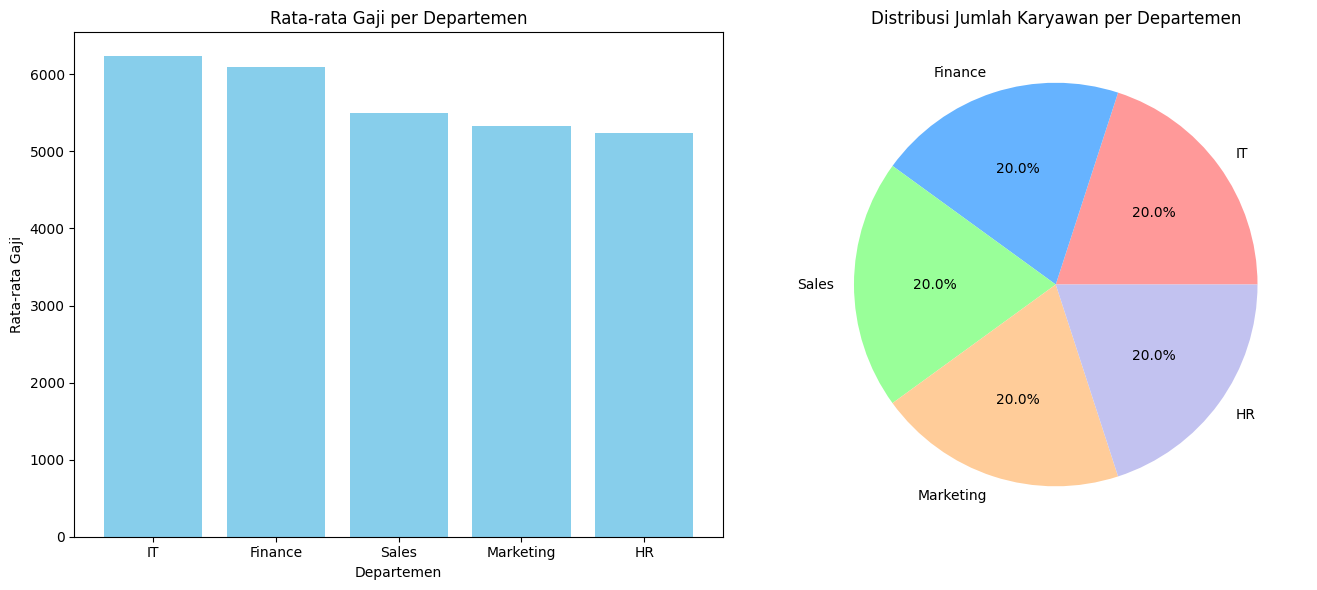

In [39]:
import matplotlib.pyplot as plt

df_plot = analisis_mendalam.toPandas()

fig, axes = plt.subplots(1,2,figsize=(14,6))

axes[0].bar(df_plot['Departemen'], df_plot['RataRata_Gaji'], color='skyblue')
axes[0].set_title('Rata-rata Gaji per Departemen')
axes[0].set_xlabel('Departemen')
axes[0].set_ylabel('Rata-rata Gaji')

axes[1].pie(df_plot['Jumlah_Karyawan'], labels=df_plot['Departemen'], autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
axes[1].set_title('Distribusi Jumlah Karyawan per Departemen')

plt.tight_layout()
plt.show()